In [1]:
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/YuriArduino/Estudos_Numpy/refs/heads/Datas_tests/apples_ts.csv'
dado = np.loadtxt (url, delimiter=',', usecols= np.arange(1,88,1))# np.arange(start, stop, step)
dados_transposto = dado.T

datas = dados_transposto[:,0]
precos = dados_transposto[:,1:6]
datas = np.arange(1,88)

Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]

Kaliningrad[4] = np.mean([Kaliningrad[3],Kaliningrad[5]])

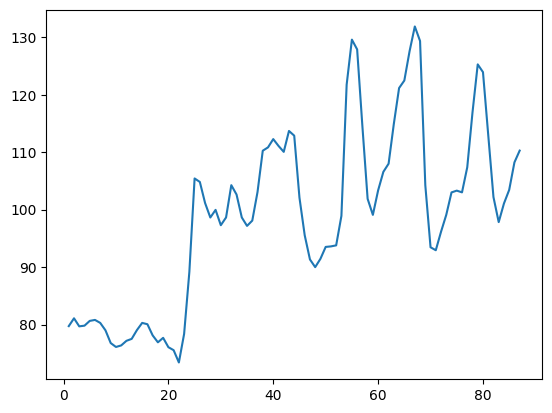

In [2]:
plt.plot(datas,Moscow)

`Ajustar uma reta`

y=ax+b

Nesta equação, o valor de y é equivalente ao preço das maçãs; x corresponde ao mês (valor de 1 a 87); a é o coeficiente angular; e b, coeficiente linear, onde a reta corta o eixo y.

In [3]:
x = datas

In [4]:
y = 2*x+80
#Aqui como valor inicial para o coeficiente angular.
#Indica que ele estamos tentando uma reta que sobe 2 unidades de preço para cada mês.

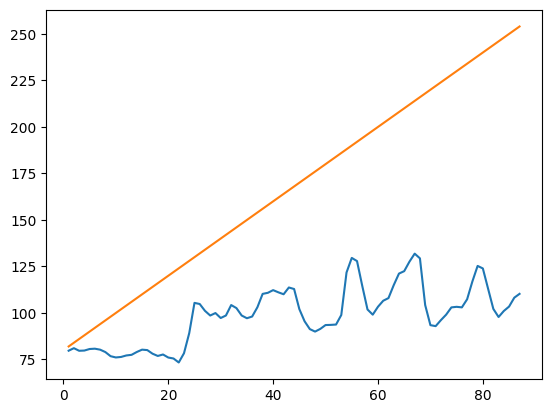

In [5]:
plt.plot(datas,Moscow)
plt.plot(x,y)

In [6]:
Moscow-y

array([  -2.28,   -2.92,   -6.32,   -8.2 ,   -9.37,  -11.2 ,  -13.72,
        -17.01,  -21.23,  -23.91,  -25.64,  -26.84,  -28.5 ,  -28.97,
        -29.72,  -31.95,  -35.89,  -39.1 ,  -40.32,  -43.95,  -46.47,
        -50.61,  -47.64,  -38.84,  -24.57,  -27.18,  -32.85,  -37.37,
        -38.04,  -42.71,  -43.36,  -39.74,  -43.37,  -49.36,  -52.83,
        -53.91,  -50.93,  -45.74,  -47.16,  -47.72,  -50.9 ,  -53.94,
        -52.3 ,  -55.12,  -67.92,  -76.46,  -82.67,  -86.01,  -86.56,
        -86.49,  -88.4 ,  -90.22,  -87.09,  -66.24,  -60.4 ,  -64.1 ,
        -79.45,  -94.12,  -98.91,  -96.65,  -95.42,  -96.  ,  -91.05,
        -86.83,  -87.52,  -84.42,  -82.11,  -86.64, -113.74, -126.55,
       -129.07, -127.85, -126.9 , -125.  , -126.69, -128.99, -126.63,
       -119.09, -112.71, -116.06, -128.97, -141.81, -148.17, -146.93,
       -146.56, -143.77, -143.72])

O array possui diversos valores negativos. Mas se a reta estivesse abaixo da linha de preços, teríamos valores positivos.

Para lidar com este problema de valores negativos e positivos, podemos elevá-los ao quadrado utilizando a função power(), que eleva valores a uma potência. Basta passarmos o valor a ser elevando e a potência desejada.

In [7]:
np.power(Moscow-y,2) #power eleva a uma potência

array([5.19840000e+00, 8.52640000e+00, 3.99424000e+01, 6.72400000e+01,
       8.77969000e+01, 1.25440000e+02, 1.88238400e+02, 2.89340100e+02,
       4.50712900e+02, 5.71688100e+02, 6.57409600e+02, 7.20385600e+02,
       8.12250000e+02, 8.39260900e+02, 8.83278400e+02, 1.02080250e+03,
       1.28809210e+03, 1.52881000e+03, 1.62570240e+03, 1.93160250e+03,
       2.15946090e+03, 2.56137210e+03, 2.26956960e+03, 1.50854560e+03,
       6.03684900e+02, 7.38752400e+02, 1.07912250e+03, 1.39651690e+03,
       1.44704160e+03, 1.82414410e+03, 1.88008960e+03, 1.57926760e+03,
       1.88095690e+03, 2.43640960e+03, 2.79100890e+03, 2.90628810e+03,
       2.59386490e+03, 2.09214760e+03, 2.22406560e+03, 2.27719840e+03,
       2.59081000e+03, 2.90952360e+03, 2.73529000e+03, 3.03821440e+03,
       4.61312640e+03, 5.84613160e+03, 6.83432890e+03, 7.39772010e+03,
       7.49263360e+03, 7.48052010e+03, 7.81456000e+03, 8.13964840e+03,
       7.58466810e+03, 4.38773760e+03, 3.64816000e+03, 4.10881000e+03,
      

Como retorno, temos um array com os valores elevados ao quadrado. Mas note que são valores muito grandes, com várias casas decimais, dificultando a análise deste ajuste.

O ideal, portanto, é conseguir resumi-los em um único número, somando-os, por exemplo. Para isso, utilizaremos a função sum(), envolvendo o cálculo como parâmetro:

In [8]:
np.sum(np.power(Moscow-y,2))

np.float64(561349.9641)

Um artifício final que podemos utilizar é calcular a raiz utilizando a função sqrt():

In [9]:
np.sqrt(np.sum(np.power(Moscow-y,2)))

np.float64(749.2329171225728)

Este valor define a qualidade de nosso ajuste.

Precisamos achar uma reta melhor, então tentemos com outro valor:

In [10]:
y = 0.52*x+80

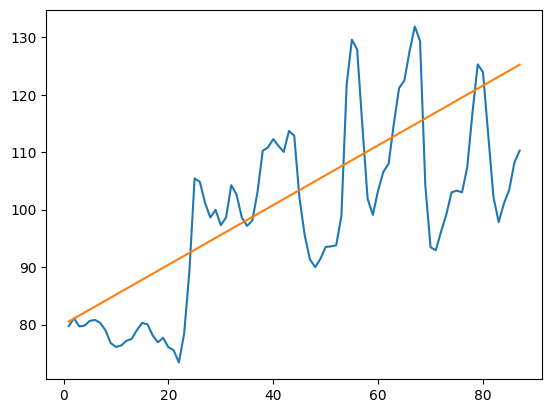

In [11]:
plt.plot(datas,Moscow)
plt.plot(x,y)

Note que, agora, a reta perpassa a linha de variação dos preços. Para saber se o cálculo nos retorna um valor menor, vamos repeti-lo:

In [12]:
np.sqrt(np.sum(np.power(Moscow-y,2)))

np.float64(110.48504740461489)

Temos um valor bem menor de ajuste. Vale ressaltar que este valor nunca será muito próximo de 0, porque o dado varia bastante, seja abaixo ou acima da reta.

Por fim, usaremos uma função que resume todo o cálculo que fizemos: linalg.norm(). Nela, passamos somente a diferença entre Moscow e y.

In [13]:
np.linalg.norm(Moscow-y)

np.float64(110.48504740461489)

---

**Ajuste de reta / Regressão Linear**

* A equação da reta: $y = a x + b$

  * `y` → variável dependente (ex.: preço das maçãs)
  * `x` → variável independente (ex.: mês)
  * `a` → coeficiente angular (inclinação da reta)
  * `b` → coeficiente linear (onde a reta cruza o eixo y)

* Podemos escrever todos os pontos como **sistema linear**:

$$
\begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots & \vdots \\ x_n & 1 \end{bmatrix}
\begin{bmatrix} a \\ b \end{bmatrix} =
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$

* **`np.linalg.lstsq`** calcula a reta que **minimiza o erro quadrático** (melhor ajuste aos dados).

```python
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
```

* **Chute inicial** (`y = 2*x + 80`) serve só para visualizar uma reta aproximada. O ajuste via álgebra linear encontra `a` e `b` corretos.

* Isso é **regressão linear simples**:

  * Linear → relação reta entre `x` e `y`
  * Simples → apenas uma variável independente

* Interpretação prática:

  * `a` → quanto o preço muda a cada mês
  * `b` → preço inicial estimado no mês zero

---


---

**Regressão Linear e Ajuste de Reta – Passo a Passo**

1. **Objetivo**
   Modelar dados com uma reta $y = a x + b$ para entender tendências e fazer previsões (ex.: preços das maçãs ao longo do tempo).

2. **Equação da reta**

   * $y$ → valor que queremos analisar (preço)
   * $x$ → variável independente (tempo: mês ou dia)
   * $a$ → coeficiente angular, inclinação da reta (quanto o preço muda por unidade de tempo)
   * $b$ → coeficiente linear, preço inicial (onde a reta cruza o eixo y)

   Ex.: $y = 2x + 80$ é apenas um chute visual para ver como a reta se comporta.

3. **Ajuste real aos dados**

   * Valores como $a = 0.52$ vêm do cálculo que minimiza a diferença entre os dados reais e os previstos (método dos mínimos quadrados).
   * Quanto menor essa diferença, melhor a reta representa os dados.

4. **Calculando erro**

   * **Erro:** diferença entre valor real e previsto: $erro = y_{real} - y_{previsto}$
   * **Quadrado do erro:** $erro^2$ → evita que sinais negativos cancelem positivos
   * **Soma dos erros ao quadrado:** indica o erro total da reta
   * **np.linalg.norm(erro)** → tira a raiz quadrada da soma, trazendo o valor de volta à escala original. Serve como medida final de “distância” entre a reta e os pontos.

5. **Resumo prático**

   * `x` e `y` → nossos dados
   * `a` e `b` → coeficientes da reta ajustada
   * `y_previsto` → valores da reta
   * `erro` → diferença entre dados reais e previstos
   * `np.linalg.norm(erro)` → medida do quão bem a reta se ajusta

Essa abordagem é **regressão linear simples**: relaciona uma variável dependente (`y`) a uma independente (`x`) de forma linear.

---


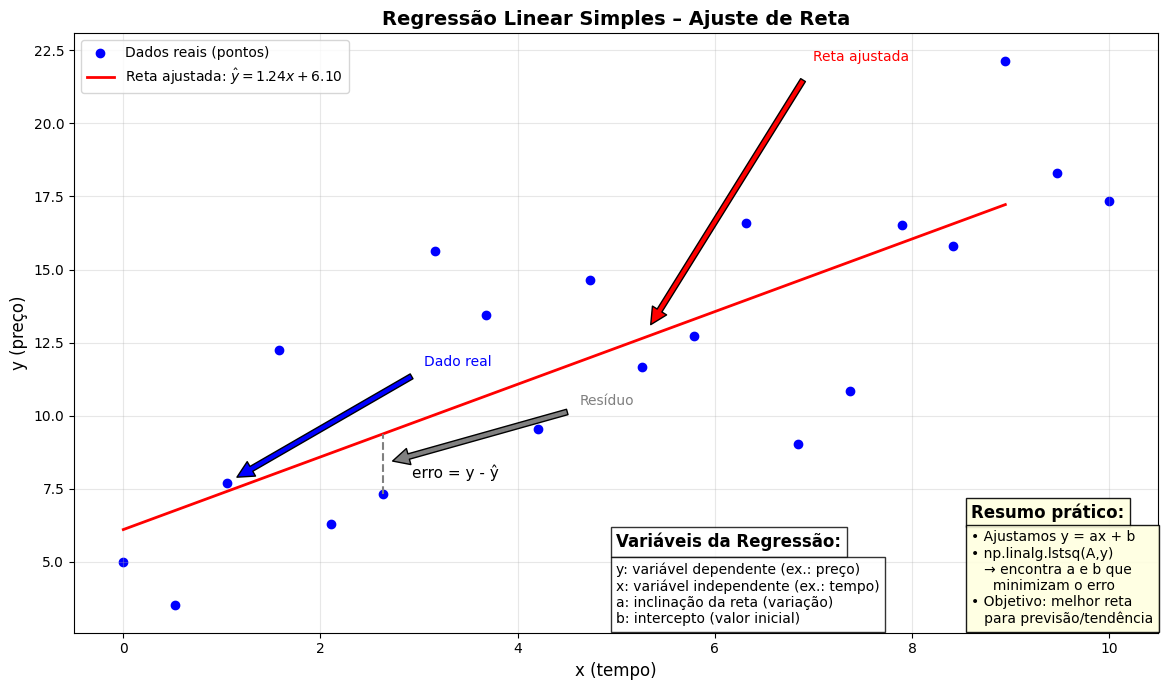

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados simulados
np.random.seed(42)
x = np.linspace(0, 10, 20)
y_real = 2 * x + 3 + np.random.randn(20) * 4  # y = 2x + 3 + ruído

# Ajuste da reta por mínimos quadrados
A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y_real, rcond=None)[0]
y_pred = a * x + b

# Plot
plt.figure(figsize=(12,7)) # Increased figure size to accommodate repositioned text boxes

# Dados
plt.scatter(x, y_real, color="blue", label="Dados reais (pontos)")

# Reta ajustada
# Plotting the line over a slightly smaller range of x-values
plt.plot(x[:-2], y_pred[:-2], color="red", linewidth=2,
           label=fr"Reta ajustada: $\hat{{y}}={a:.2f}x+{b:.2f}$")

# Exemplo de resíduo (erro)
i = 5  # one point
plt.vlines(x[i], y_real[i], y_pred[i], colors="gray", linestyles="dashed")
plt.text(x[i]+0.3, (y_real[i]+y_pred[i])/2 - 0.5, # Adjusted y-coordinate
           "erro = y - ŷ", fontsize=11, color="black")

# Caixa explicativa de variáveis
texto_vars_title = "Variáveis da Regressão:"
texto_vars_content = [
    "y: variável dependente (ex.: preço)",
    "x: variável independente (ex.: tempo)",
    "a: inclinação da reta (variação)",
    "b: intercepto (valor inicial)"
] # Closing the square bracket here

plt.text(5, 5.5, texto_vars_title, fontsize=12, fontweight='bold',
           bbox=dict(facecolor="white", edgecolor="black", alpha=0.8))
plt.text(5, 2.9, "\n".join(texto_vars_content), fontsize=10,
           bbox=dict(facecolor="white", edgecolor="black", alpha=0.8))


# Caixa de resumo prático
texto_resumo_title = "Resumo prático:"
texto_resumo_content = [
    "• Ajustamos y = ax + b",
    "• np.linalg.lstsq(A,y)",
    "   → encontra a e b que",
    "     minimizam o erro",
    "• Objetivo: melhor reta",
    "   para previsão/tendência"
]
plt.text(8.6, 6.5, texto_resumo_title, fontsize=12, fontweight='bold',
           bbox=dict(facecolor="lightyellow", edgecolor="black", alpha=0.9))
plt.text(8.6, 2.9, "\n".join(texto_resumo_content), fontsize=10,
           bbox=dict(facecolor="lightyellow", edgecolor="black", alpha=0.9))

# Add annotation for the regression line
plt.annotate('Reta ajustada', xy=(x[10], y_pred[10]), xytext=(7, max(y_real)), # Adjusted y-coordinate
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# Add annotation for a data point
plt.annotate('Dado real', xy=(x[2], y_real[2]), xytext=(x[2] + 2, y_real[2] + 4),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             fontsize=10, color='blue')

# Add annotation for the residual line
plt.annotate('Resíduo', xy=(x[i], (y_real[i] + y_pred[i])/2), xytext=(x[i] + 2, (y_real[i] + y_pred[i])/2 + 2),
             arrowprops=dict(facecolor='gray', shrink=0.05),
             fontsize=10, color='gray')


# Configuração dos eixos
plt.xlabel("x (tempo)", fontsize=12)
plt.ylabel("y (preço)", fontsize=12)
plt.title("Regressão Linear Simples – Ajuste de Reta", fontsize=14, weight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

### Diferença entre `=` e `np.copy()` no NumPy

* `=` **não cria um novo array**.
  Ele apenas cria **outra referência** (apelido) para o mesmo objeto na memória.
  👉 Alterações em um afetam o outro.

```python
import numpy as np

a = np.array([1, 2, 3])
b = a  # mesma referência
a[0] = 99
print(b)  # [99  2  3]
```

---

* `np.copy()` **cria um novo array independente**, com outro bloco de memória.
  👉 Alterações no original **não afetam a cópia**.

```python
c = np.copy(a)  # nova cópia real
a[0] = 123
print(c)  # permanece [99  2  3]
```

---

📌 Resumindo:

* Use `=` quando quiser **apenas mais uma referência** ao mesmo objeto.
* Use `np.copy()` quando precisar de uma **cópia independente**, que não será alterada junto com o original.

---


In [15]:
import numpy as np

a = np.array([1, 2, 3])
b = a
c = np.copy(a)

print(id(a), id(b), id(c))



132941812642992 132941812642992 132941812641264


`Calculando o coeficiente angular (a)`

O coeficiente angular pode ser obtido pela seguinte equação:

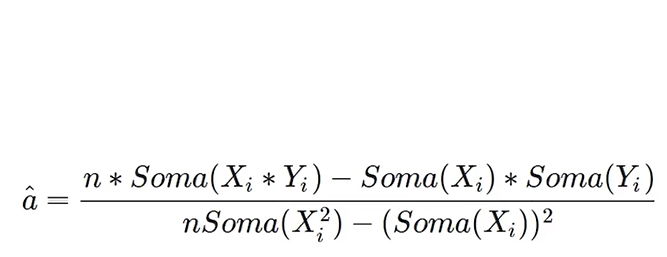



In [24]:
#Vale ressaltar que:

#â = coeficiente angular;
#n = número de elementos;
#Y = Moscow;
#X = datas.

Y = Moscow
X = datas
n = np.size(Moscow) #Função np.size() pode receber um array e opcionalmente um eixo (axis)
# para contar elementos apenas nessa dimensão

In [17]:
X**2

array([   1,    4,    9,   16,   25,   36,   49,   64,   81,  100,  121,
        144,  169,  196,  225,  256,  289,  324,  361,  400,  441,  484,
        529,  576,  625,  676,  729,  784,  841,  900,  961, 1024, 1089,
       1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936,
       2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025,
       3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356,
       4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929,
       6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569])

In [18]:
(X**2).shape

(87,)

In [19]:
(n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)

np.float64(0.43520212145512926)

In [20]:
a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)

`Calculando o coeficiente linear (b)`

** fórmula linear de regressão simples** no estilo estatístico:

$$
\hat{b} = \text{Média}(Y_i) - \hat{a} \cdot \text{Média}(X_i)
$$

Onde:

* $Y_i$ = valores da variável dependente
* $X_i$ = valores da variável independente
* $\hat{a}$ = coeficiente angular (slope) da regressão
* $\hat{b}$ = coeficiente linear (intercept) da regressão

In [21]:
b = np.mean(Y) - a*np.mean(X)

In [22]:
y = a*X+b

In [23]:
np.linalg.norm(Moscow-y)

np.float64(101.7969539992751)